## Problem Statement :
#### A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

### Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

#### Importing neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

#### Loading dataset

In [2]:

df=pd.read_csv('E:/ML projects/workspace/dataset/data.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
df.shape

(550068, 12)

In [7]:
#Dropping the User_ID column in which it is not useful
df.drop(['User_ID'],axis=1,inplace=True)

In [8]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#### Handling Categorical feature

In [9]:
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


In [10]:
#Another technique pd.get_dummies(df['Gender'],drop_first=True)

In [11]:
#Handling Categirical feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [13]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969


In [14]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [15]:
df_city=df_city.replace({True:1,False:0})
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [16]:
df=pd.concat([df,df_city],axis=1)

In [17]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969,0,1


In [18]:
#dropping the City_Category column paramently
df.drop(['City_Category'],axis=1,inplace=True)

In [19]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969,0,1


#### Handling Missing values

In [20]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
B                                  0
C                                  0
dtype: int64

In [21]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [22]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64

In [23]:
#Mode
df['Product_Category_2'].mode()[0]

np.float64(8.0)

In [24]:
#replace the missing values with MODE
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [25]:
df['Product_Category_2'].isnull().sum()

np.int64(0)

In [26]:
df['Product_Category_3'].isnull().sum()

np.int64(383247)

In [27]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [28]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: count, dtype: int64

In [29]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [30]:
df['Product_Category_3'].isnull().sum()

np.int64(0)

In [31]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

In [32]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969,0,1


In [33]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [34]:
##Replacing the + with Space
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [35]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [36]:
#Note: convert all the objects into integers or floats

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  int64  
 11  C                           550068 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 50.4+ MB


In [38]:
#converting the Object type to integer
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)


In [39]:
df.drop(['Product_ID'],axis=1,inplace=True)

## Exploratory Data Analysis

<Axes: xlabel='Purchase', ylabel='Count'>

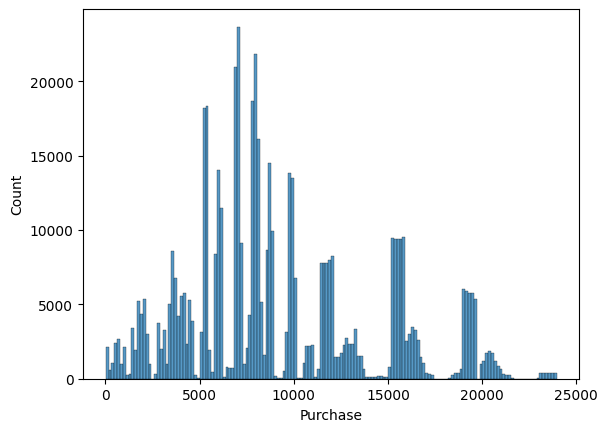

In [40]:
sns.histplot(df['Purchase'])

<Axes: xlabel='Age', ylabel='Purchase'>

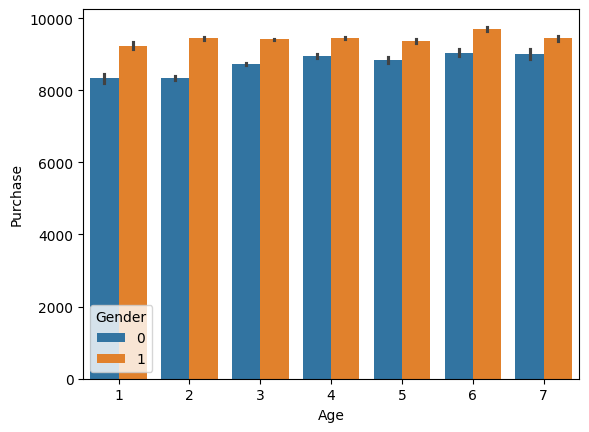

In [41]:
##Visualisation of Age vs Purchase
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)


<Axes: xlabel='Occupation', ylabel='Purchase'>

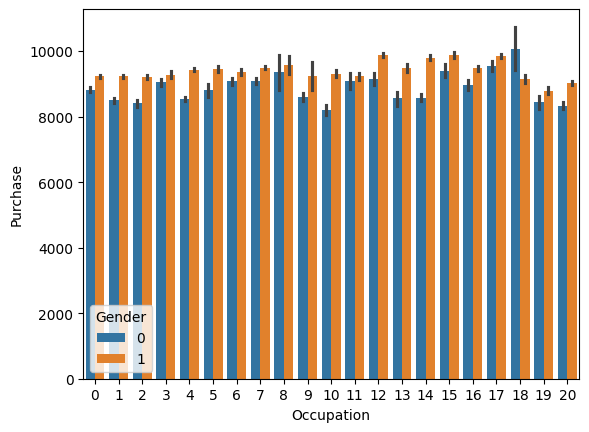

In [42]:
#Visualization of purchase with occupation
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)


<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

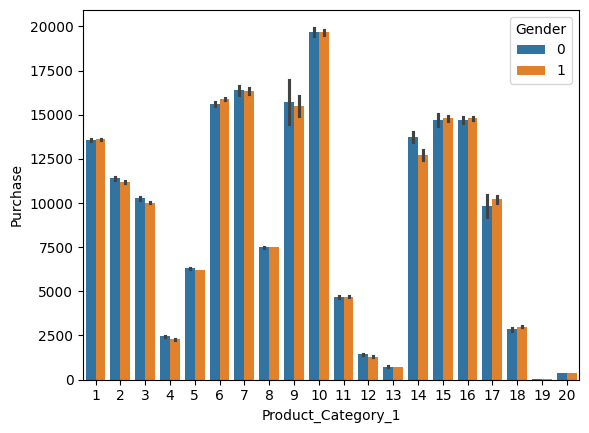

In [43]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender', data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

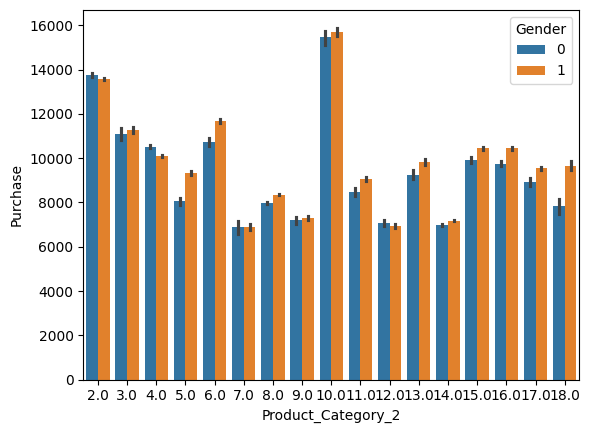

In [44]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender', data=df)

#### Independent and dependent features

In [45]:
X=df.drop(['Purchase'],axis=1) #all columns without last column

In [46]:
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0
2,0,1,10,2,0,12,8.0,16.0,0,0
3,0,1,10,2,0,12,14.0,16.0,0,0
4,1,7,16,4,0,8,8.0,16.0,0,1


In [47]:
X.shape

(550068, 10)

In [48]:
Y=df['Purchase'] # Last column

In [49]:
Y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [50]:
Y.shape

(550068,)

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

#### Standardization

In [52]:
#Feature Scalling -- Converting the values to the 0 to 1 range to make Model to run fastly
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [53]:
X_train

array([[ 0.57162531, -0.36693322,  1.21508142, ...,  0.36881237,
        -0.85069198, -0.67262255],
       [ 0.57162531, -0.36693322, -1.08479527, ...,  0.36881237,
         1.17551361, -0.67262255],
       [ 0.57162531, -1.1051074 , -0.1648446 , ...,  0.36881237,
        -0.85069198, -0.67262255],
       ...,
       [-1.74939769, -1.1051074 , -1.08479527, ...,  0.36881237,
         1.17551361, -0.67262255],
       [-1.74939769, -1.1051074 , -0.62481993, ...,  0.36881237,
         1.17551361, -0.67262255],
       [-1.74939769, -1.1051074 , -0.93147016, ...,  0.36881237,
        -0.85069198, -0.67262255]])

In [54]:
X_train.shape,X_test.shape

((385047, 10), (165021, 10))

#### Model Training and Evaluation

#### Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("r2 score : ",r2_score(y_test,y_pred))
print("mean absolute error : ",mean_absolute_error(y_test,y_pred))

r2 score :  0.12927310647633372
mean absolute error :  3577.4327862411146
